<a href="https://colab.research.google.com/github/Jyoti-jm9/Carprice/blob/main/Carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading and explore Data
import pandas as pd

# Load your CSV file
file_path = '/content/car data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary information
print(data.head())
print(data.info())
print(data.describe())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non

test_size=0.2:
Specifies the proportion of the dataset to allocate for testing.
In this case, 20% of the data will be used as the testing set, and the remaining 80% as the training set.
random_state=42:
Ensures reproducibility by controlling the randomness of the data splitting.
Any fixed integer value can be used. Using the same random_state ensures the same split every time the code is run.


In [3]:
#preprocessing
from sklearn.model_selection import train_test_split

# Identify target column (e.g., 'Price') and features
target = 'Selling_Price'
X = data.drop(columns=[target])
y = data[target]

# Convert categorical data to numerical, if needed
X1 = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
#X
X1

,Year,Present_Price,Kms_Driven,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,9.54,43000,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,6.87,42450,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,5.90,60000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,11.00,87934,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,12.50,9000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 9.225663641224129
R-squared: 0.5995038184033071


r-squared value range between 0 to 1 . close to 1 describes its fitness . here it is 0.59 means it does not feat very well .

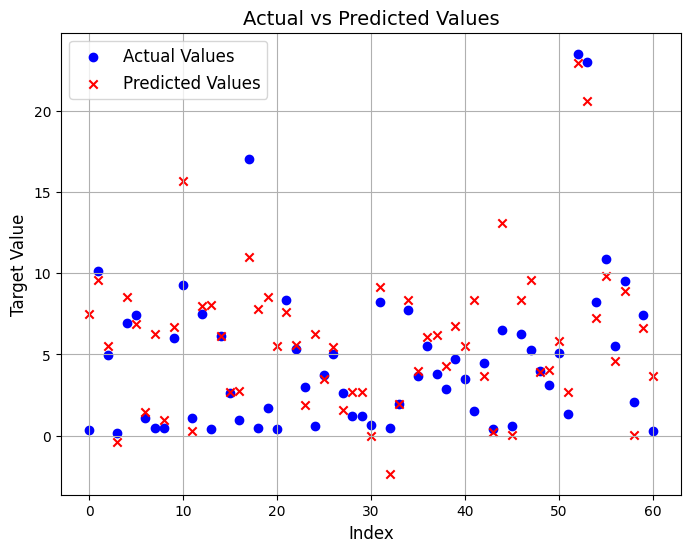

In [5]:
#visualize
import matplotlib.pyplot as plt

# Scatter plot to show actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', marker='x')

# Adding labels, title, and legend
plt.title("Actual vs Predicted Values", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Target Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



In [6]:
import pandas as pd

# Create a DataFrame with Actual and Predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results_df



,Actual,Predicted
177,0.35,7.461611
289,10.11,9.593121
228,4.95,5.505167
198,0.15,-0.409582
60,6.95,8.564930
...,...,...
234,5.50,4.590096
296,9.50,8.921080
281,2.10,0.038782
285,7.40,6.616908
